# Population and samples in statistics

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
from IPython.display import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_06


## Coffee cup volumes in a café (simulated data)

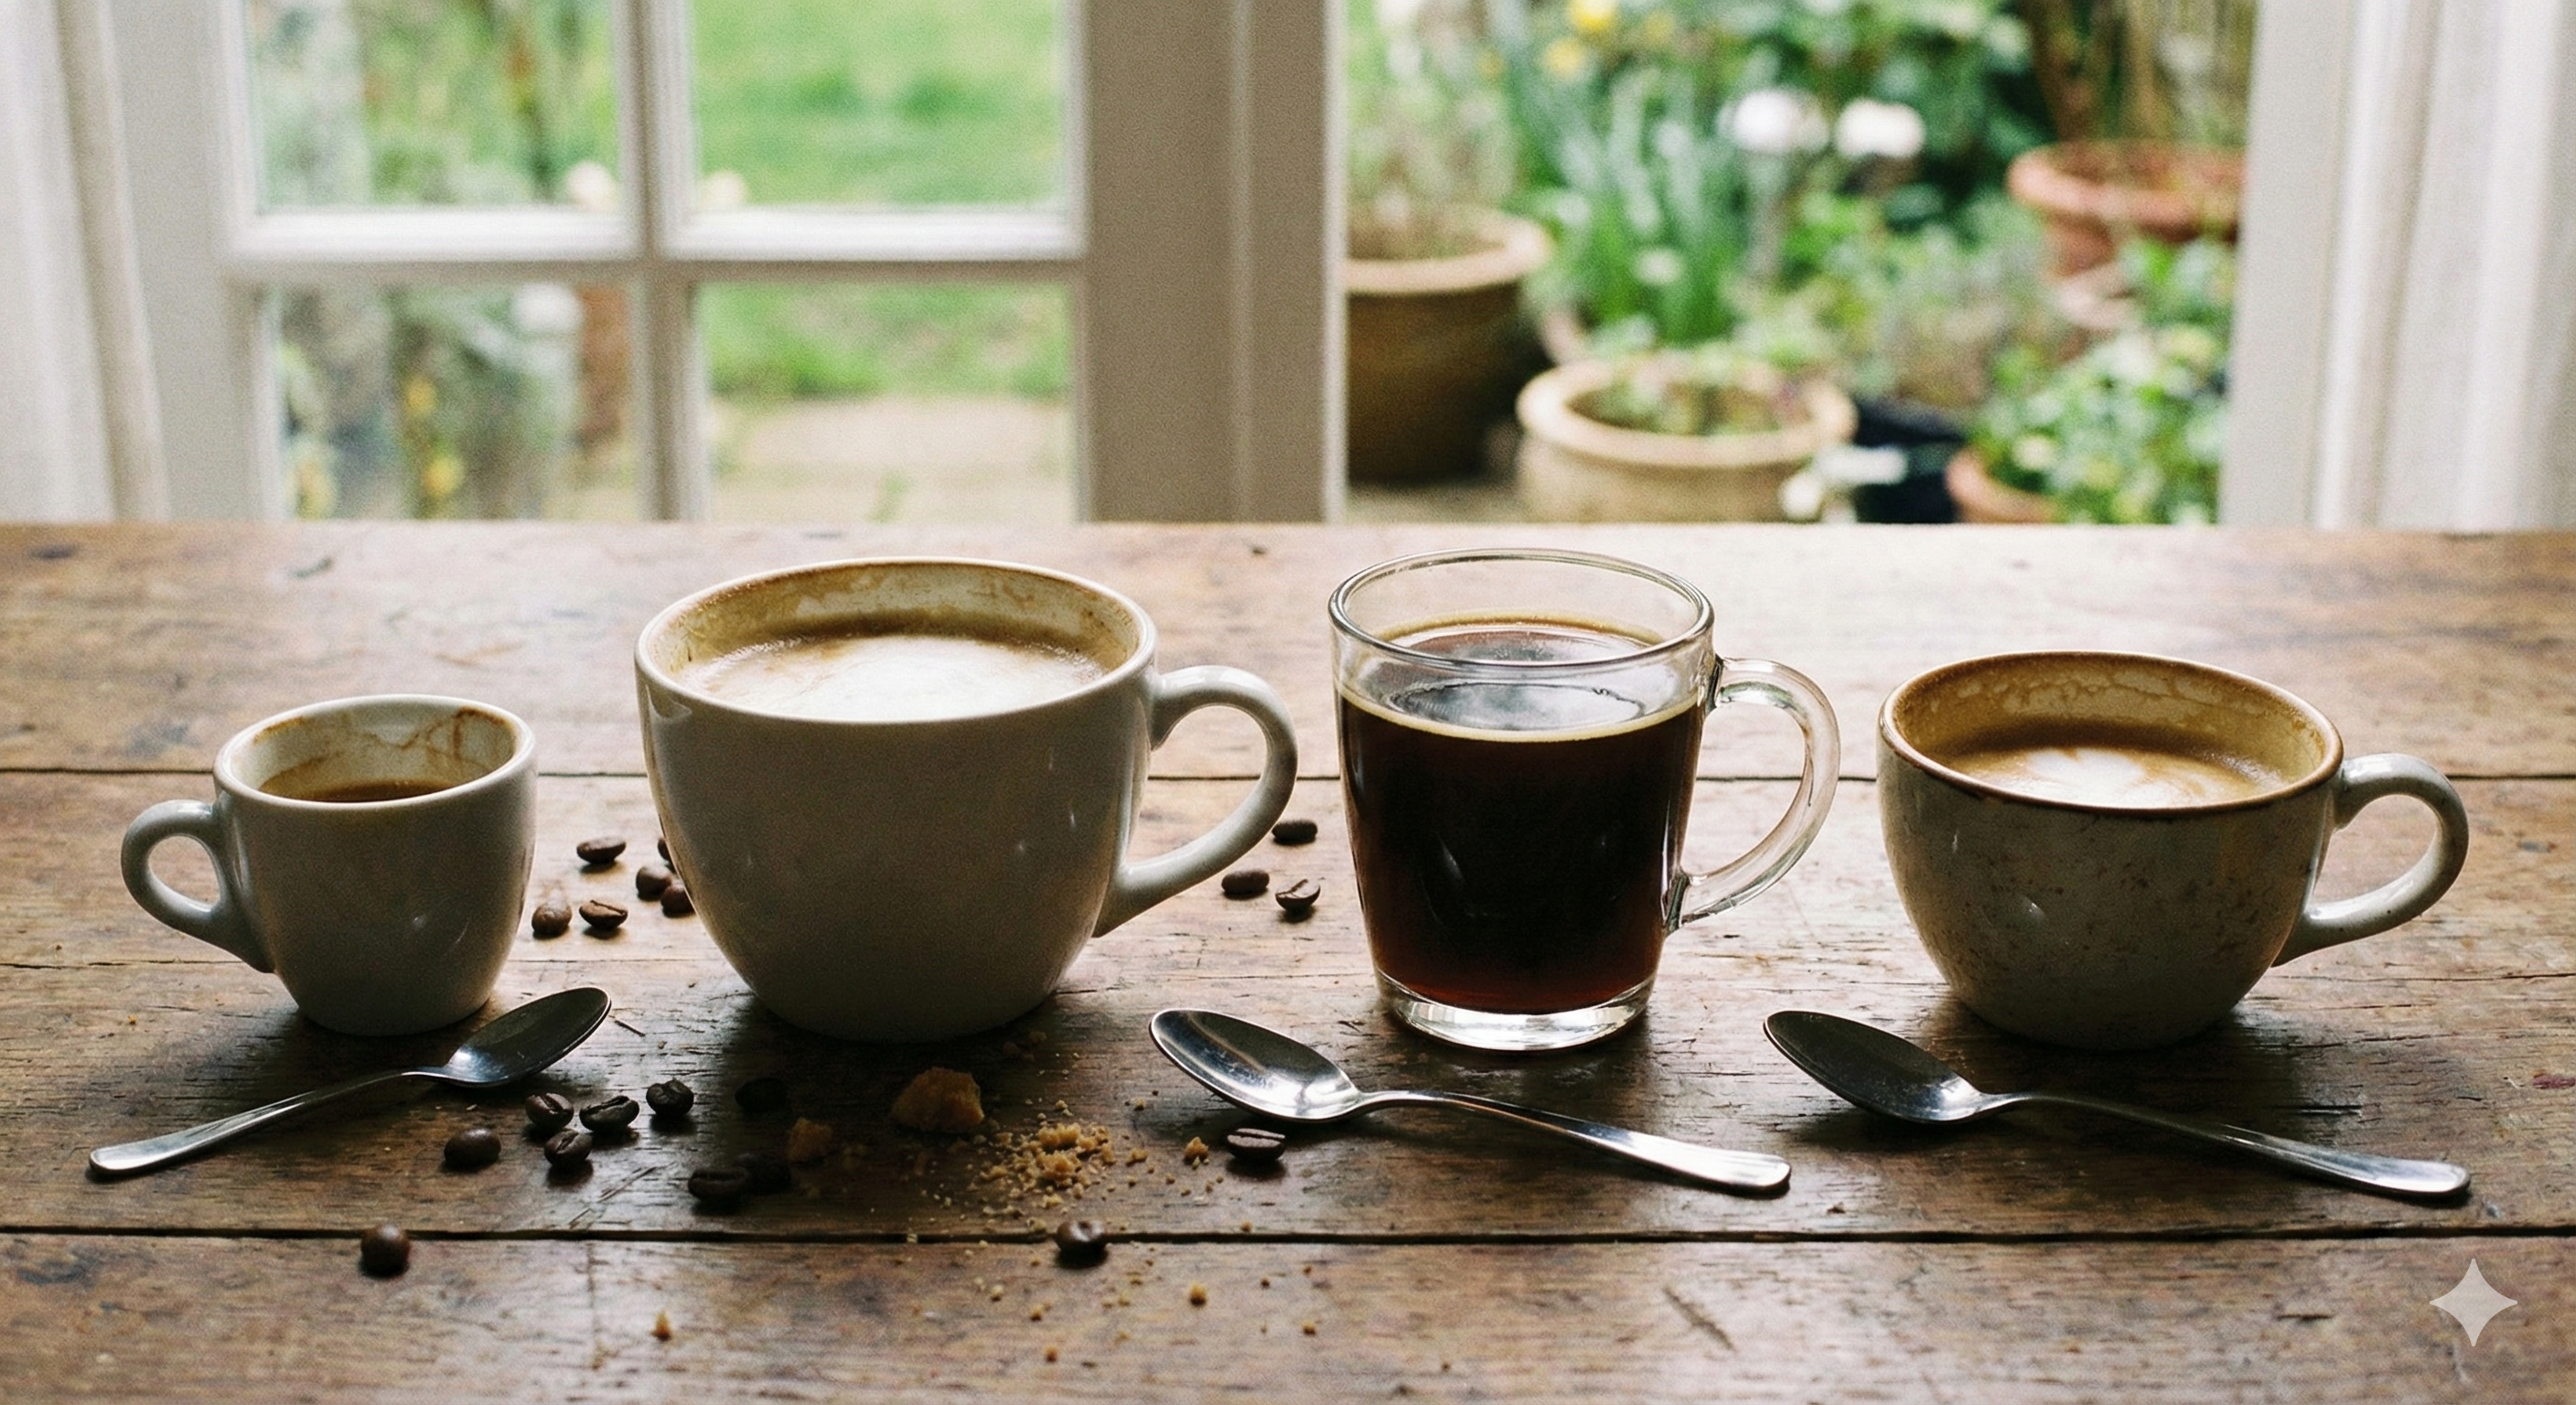

In [3]:
Image("coffee.png", width=800)

5000
240.0840
14.9457


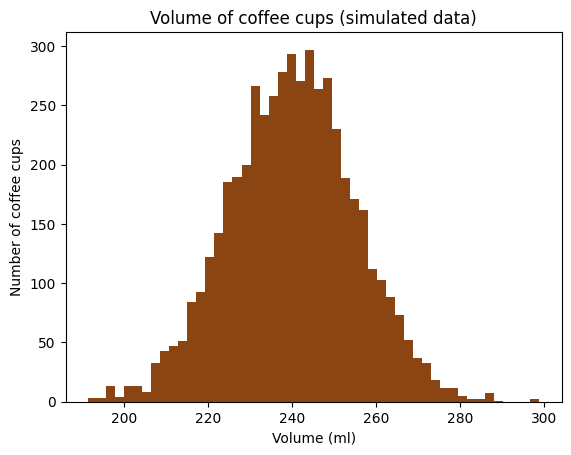

In [4]:
# Parameters of distribution (Coffee cup volumes in milliliters)
p_mean = 240  # Mean volume: 240 ml
p_std = 15    # Standard deviation: 15 ml
p_n = 5000    # Number of coffee cups served

# Setting a seed to restore the random numbers later
np.random.seed(42)

# Generate (normally distributed) data with mean = 2800 g and standard deviation = 240 g
pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)
print(f'{len(pop):.0f}')
print(f'{np.mean(pop):.4f}')
print(f'{np.std(pop):.4f}')

# Plot histogram based on the data
plt.hist(pop, bins = 50, color='saddlebrown')
plt.title('Volume of coffee cups (simulated data)')
plt.xlabel('Volume (ml)')
plt.ylabel('Number of coffee cups')

plt.show()

## Single random sample from the population

Mean: 238.7309
Standard deviation: 14.7311


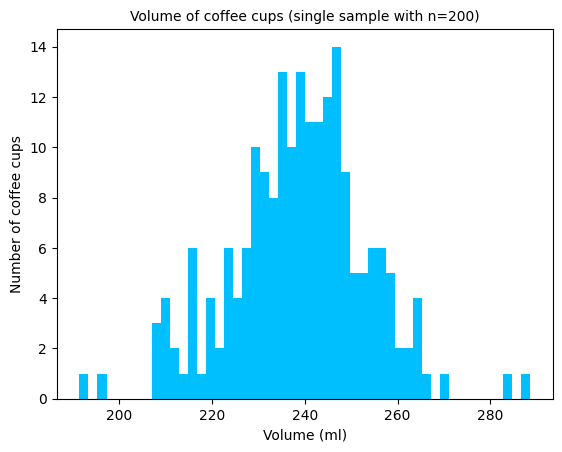

In [5]:
# Sample size
sample_size = 200

# Set random seed for reproducibility
random.seed(42)

# Random sample from the population (without replacement)
random_sample = random.sample(list(pop), sample_size)

# Statistics of the sample
print(f'Mean: {statistics.mean(random_sample):.4f}')
print(f'Standard deviation: {statistics.stdev(random_sample):.4f}')

# Plot histogram based on the sample
plt.hist(random_sample, bins = 50, color='deepskyblue')
plt.title(f'Volume of coffee cups (single sample with n={sample_size})', fontsize=10)
plt.xlabel('Volume (ml)')
plt.ylabel('Number of coffee cups')

plt.show()

## Repeated random sampling 'with replacement' (bootstrapping)

## Exploring the effect of sample size on single samples

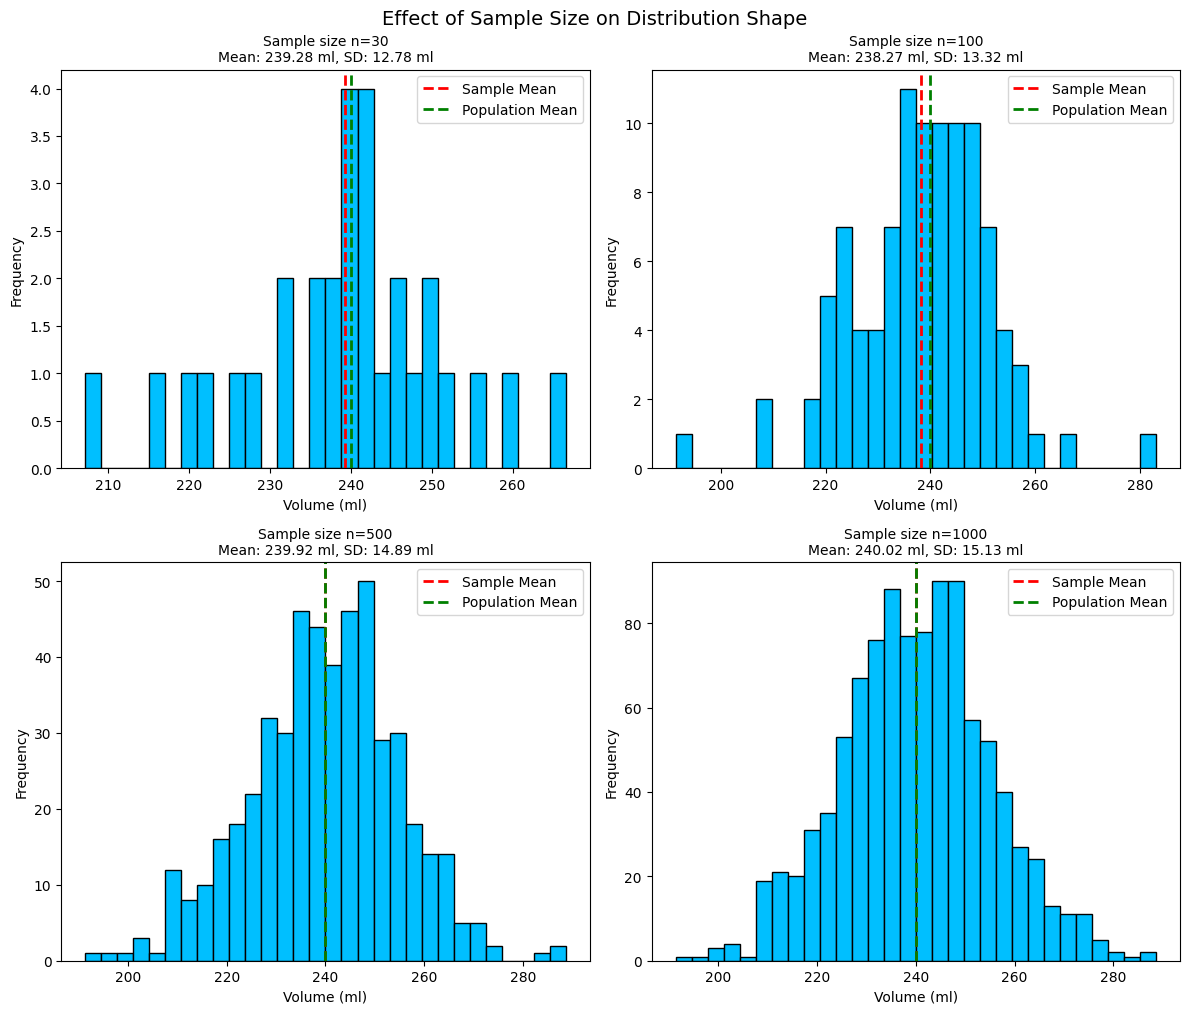


Observations:
- Smaller samples (n=30) show more irregular, jagged histograms
- Larger samples (n=500, n=1000) show smoother, more normal-looking distributions
- As sample size increases, the sample mean gets closer to the population mean (240 ml)


In [6]:
# Regenerate population for consistency
np.random.seed(42)
pop = np.random.normal(loc=240, scale=15, size=5000)

# Test different sample sizes
sample_sizes = [30, 100, 500, 1000]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, sample_size in enumerate(sample_sizes):
    random.seed(42)
    random_sample = random.sample(list(pop), sample_size)
    
    mean = statistics.mean(random_sample)
    std = statistics.stdev(random_sample)
    
    axes[idx].hist(random_sample, bins=30, color='deepskyblue', edgecolor='black')
    axes[idx].set_title(f'Sample size n={sample_size}\nMean: {mean:.2f} ml, SD: {std:.2f} ml', fontsize=10)
    axes[idx].set_xlabel('Volume (ml)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Sample Mean')
    axes[idx].axvline(240, color='green', linestyle='--', linewidth=2, label=f'Population Mean')
    axes[idx].legend()

plt.tight_layout()
plt.suptitle('Effect of Sample Size on Distribution Shape', fontsize=14, y=1.01)
plt.show()

print("\nObservations:")
print("- Smaller samples (n=30) show more irregular, jagged histograms")
print("- Larger samples (n=500, n=1000) show smoother, more normal-looking distributions")
print("- As sample size increases, the sample mean gets closer to the population mean (240 ml)")

## Exploring the effect of sample size and iterations on bootstrap samples

EXPERIMENT 1: Effect of Sample Size (fixed 1000 iterations)

n=50: Mean=240.0664, SD=2.1290

n=200: Mean=240.0428, SD=1.0602

n=500: Mean=240.0742, SD=0.6567

n=1000: Mean=240.0728, SD=0.4790

n=200: Mean=240.0428, SD=1.0602

n=500: Mean=240.0742, SD=0.6567

n=1000: Mean=240.0728, SD=0.4790


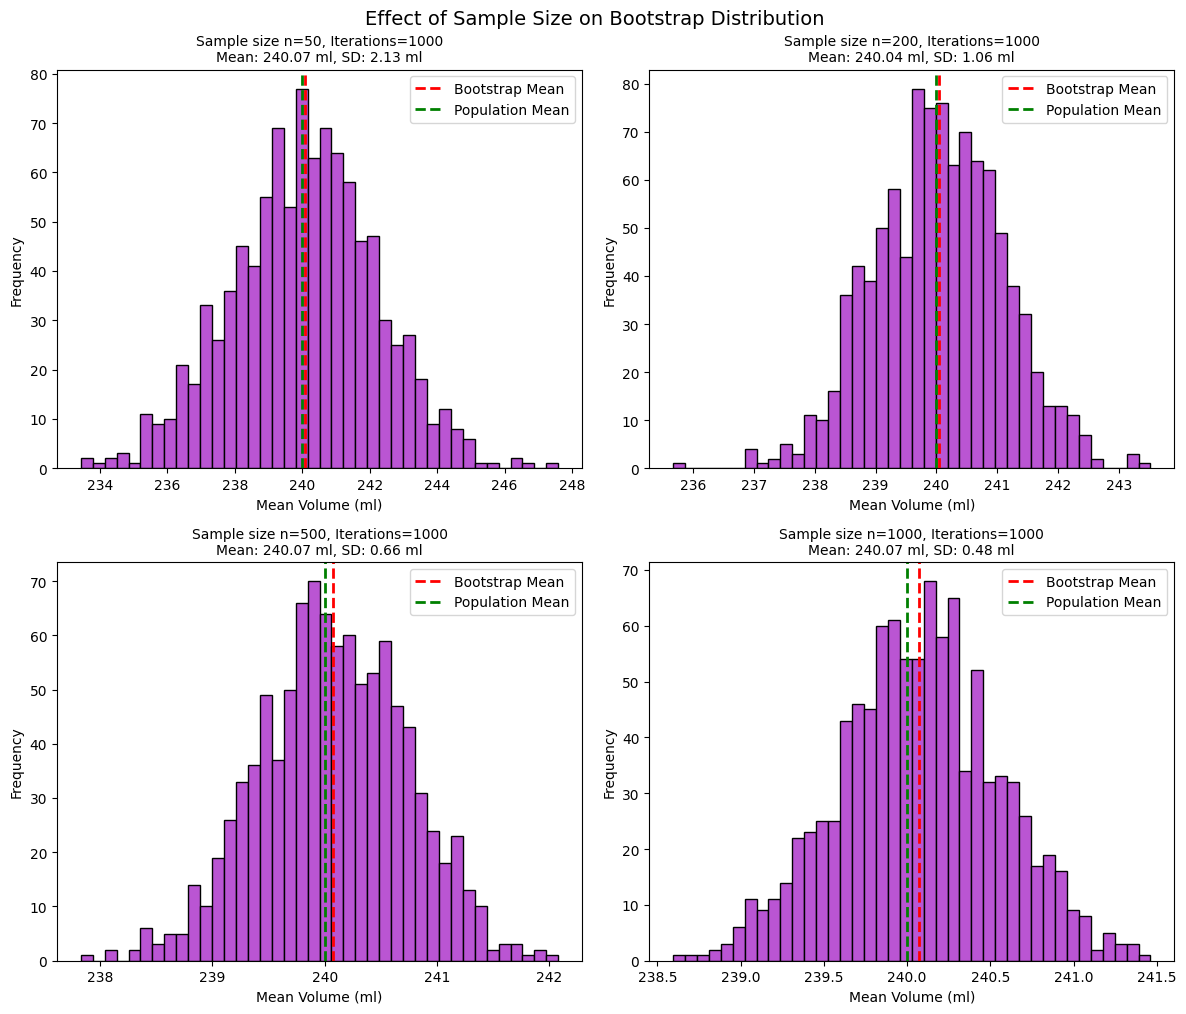


Key Observations:
- Larger sample sizes produce narrower (less variable) bootstrap distributions
- This demonstrates the Standard Error decreases as sample size increases
- SE approximation: SD/√n


In [7]:
# Experiment 1: Varying sample sizes with fixed iterations
print("=" * 60)
print("EXPERIMENT 1: Effect of Sample Size (fixed 1000 iterations)")
print("=" * 60)

sample_sizes_bootstrap = [50, 200, 500, 1000]
fixed_iterations = 1000

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, sample_size in enumerate(sample_sizes_bootstrap):
    np.random.seed(42)
    pop = np.random.normal(loc=240, scale=15, size=5000)
    
    sample_mean = []
    for i in range(fixed_iterations):
        samp = np.random.choice(pop, size=sample_size, replace=True)
        avg = np.mean(samp)
        sample_mean.append(avg)
    
    mean_of_means = np.mean(sample_mean)
    std_of_means = np.std(sample_mean)
    
    axes[idx].hist(sample_mean, bins=40, color='mediumorchid', edgecolor='black')
    axes[idx].set_title(f'Sample size n={sample_size}, Iterations={fixed_iterations}\nMean: {mean_of_means:.2f} ml, SD: {std_of_means:.2f} ml', fontsize=10)
    axes[idx].set_xlabel('Mean Volume (ml)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(mean_of_means, color='red', linestyle='--', linewidth=2, label=f'Bootstrap Mean')
    axes[idx].axvline(240, color='green', linestyle='--', linewidth=2, label=f'Population Mean')
    axes[idx].legend()
    
    print(f"\nn={sample_size}: Mean={mean_of_means:.4f}, SD={std_of_means:.4f}")

plt.tight_layout()
plt.suptitle('Effect of Sample Size on Bootstrap Distribution', fontsize=14, y=1.01)
plt.show()

print("\nKey Observations:")
print("- Larger sample sizes produce narrower (less variable) bootstrap distributions")
print("- This demonstrates the Standard Error decreases as sample size increases")
print("- SE approximation: SD/√n")


EXPERIMENT 2: Effect of Number of Iterations (fixed n=200)

Iterations=100: Mean=240.0773, SD=0.9676

Iterations=500: Mean=240.0509, SD=1.0734

Iterations=2000: Mean=240.0626, SD=1.0573

Iterations=500: Mean=240.0509, SD=1.0734

Iterations=2000: Mean=240.0626, SD=1.0573

Iterations=5000: Mean=240.0728, SD=1.0549

Iterations=5000: Mean=240.0728, SD=1.0549


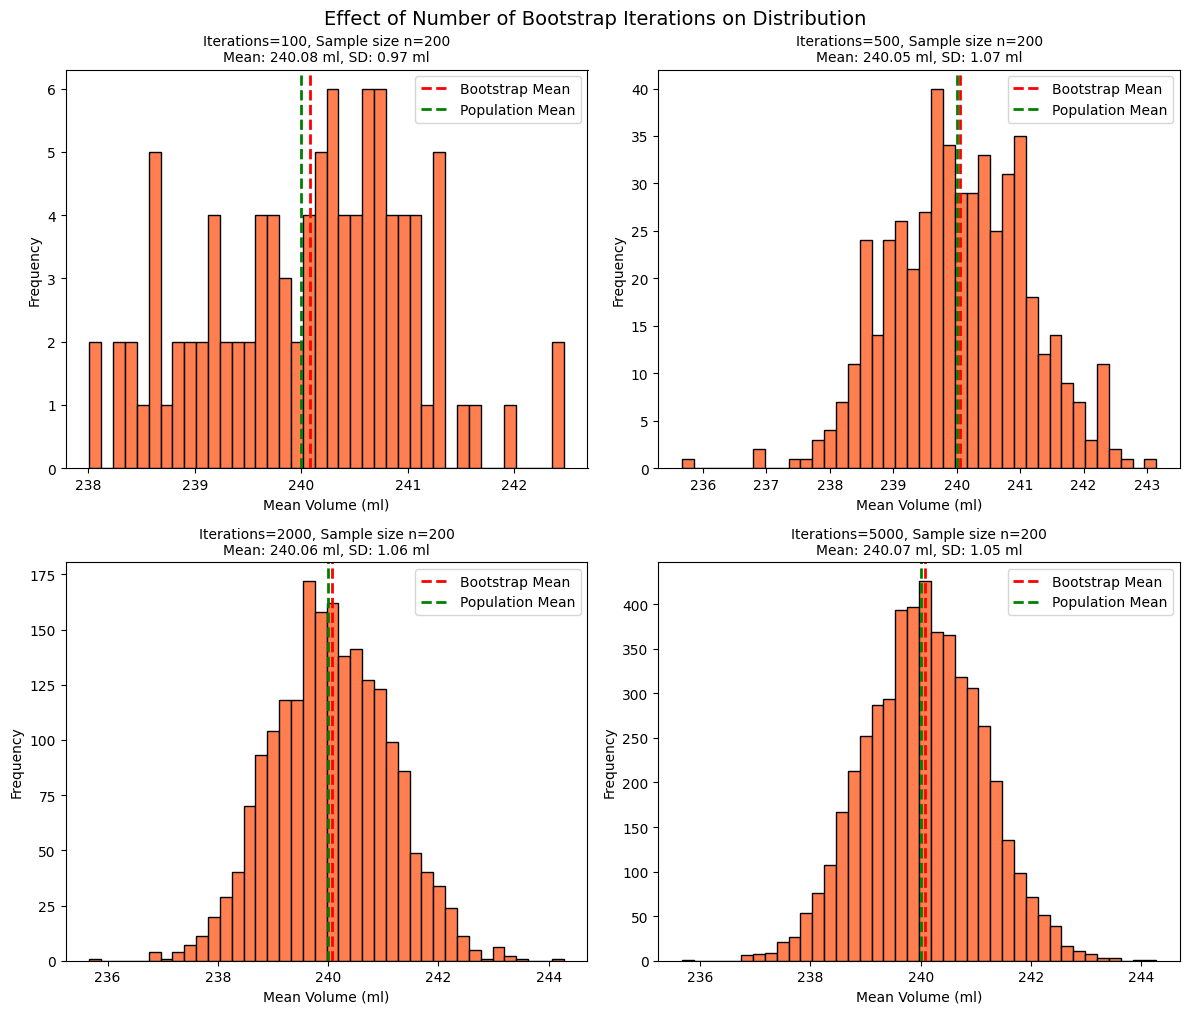


Key Observations:
- More iterations create smoother, more stable bootstrap distributions
- The mean and standard deviation converge to stable values
- Distribution shape becomes more clearly normal with more iterations
- However, the spread (SD) remains similar across different iteration counts


In [8]:
# Experiment 2: Varying number of iterations with fixed sample size
print("\n" + "=" * 60)
print("EXPERIMENT 2: Effect of Number of Iterations (fixed n=200)")
print("=" * 60)

fixed_sample_size = 200
iteration_counts = [100, 500, 2000, 5000]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, num_iter in enumerate(iteration_counts):
    np.random.seed(42)
    pop = np.random.normal(loc=240, scale=15, size=5000)
    
    sample_mean = []
    for i in range(num_iter):
        samp = np.random.choice(pop, size=fixed_sample_size, replace=True)
        avg = np.mean(samp)
        sample_mean.append(avg)
    
    mean_of_means = np.mean(sample_mean)
    std_of_means = np.std(sample_mean)
    
    axes[idx].hist(sample_mean, bins=40, color='coral', edgecolor='black')
    axes[idx].set_title(f'Iterations={num_iter}, Sample size n={fixed_sample_size}\nMean: {mean_of_means:.2f} ml, SD: {std_of_means:.2f} ml', fontsize=10)
    axes[idx].set_xlabel('Mean Volume (ml)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(mean_of_means, color='red', linestyle='--', linewidth=2, label=f'Bootstrap Mean')
    axes[idx].axvline(240, color='green', linestyle='--', linewidth=2, label=f'Population Mean')
    axes[idx].legend()
    
    print(f"\nIterations={num_iter}: Mean={mean_of_means:.4f}, SD={std_of_means:.4f}")

plt.tight_layout()
plt.suptitle('Effect of Number of Bootstrap Iterations on Distribution', fontsize=14, y=1.01)
plt.show()

print("\nKey Observations:")
print("- More iterations create smoother, more stable bootstrap distributions")
print("- The mean and standard deviation converge to stable values")
print("- Distribution shape becomes more clearly normal with more iterations")
print("- However, the spread (SD) remains similar across different iteration counts")

240.0428
14.8657


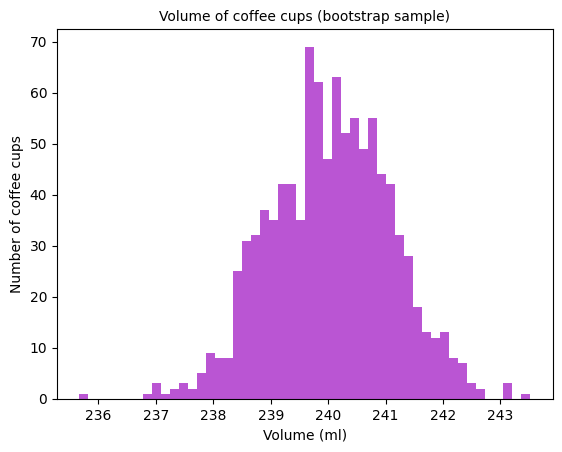

In [9]:
def bootstrap(p_mean = 2800, p_std = 240, p_n =25000, num_iter = 5000, sample_size = 200):
    """
    Creates bootstrap sample from a distribution.

    :param p_mean population mean. Type = int, float
    :param p_std: Type = int, float
    :param p_n: Type = int, float
    :param num_iter: number of iterations. Type = int
    :param sample_size: size of single bootstrap sample. Type = int
    :return: plot of bootstrap sample.
    """

    # Setting a seed to restore the random numbers later
    np.random.seed(42)

    # Generate (normally distributed) data
    pop = np.random.normal(loc=p_mean, scale=p_std, size=p_n)

    # Create empty lists to save results of iterations
    sample_mean = []
    sample_std  = []

    # Loop for iterations
    for i in range(num_iter):
        samp = np.random.choice(pop, size=sample_size, replace=True)
        avg = np.mean(samp)
        std = np.std(samp)
        sample_mean.append(avg)
        sample_std.append(std)

    # Print mean and sd of bootsstapped distribution
    print(f'{np.mean(sample_mean):.4f}')
    print(f'{np.mean(sample_std):.4f}')

    # Plot histogram based on the bootstrapped data
    plt.hist(sample_mean, bins = 50, color='mediumorchid')
    plt.title('Volume of coffee cups (bootstrap sample)', fontsize=10)
    plt.xlabel('Volume (ml)')
    plt.ylabel('Number of coffee cups')
    plt.show()

# Function call with coffee cup parameters
bootstrap(p_mean=240, p_std=15, p_n=5000, num_iter=1000, sample_size=200)


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')